# RQ2 Analysis (CRUD operations)

## Graph Types

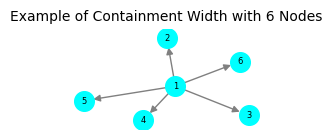

In [326]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3, 4, 5, 6]) 
G.add_edges_from([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6)])
pos = nx.spring_layout(G) 
plt.figure(figsize=(2, 1)) 
nx.draw(G, pos=pos, with_labels=True, node_color='cyan', node_size=200,
        edge_color='gray', font_size=6, arrows=True, arrowstyle='-|>', arrowsize=10)
plt.title("Example of Containment Width with 6 Nodes", fontsize=10)
plt.axis('off')
plt.show()

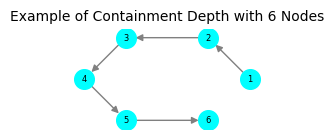

In [285]:
import networkx as nx
import matplotlib.pyplot as plt
 
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3, 4, 5, 6]) 
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]) 
pos = nx.circular_layout(G) 
plt.figure(figsize=(2, 1)) 
nx.draw(G, pos=pos, with_labels=True, node_color='cyan', node_size=200,
        edge_color='gray', font_size=6, arrows=True, arrowstyle='-|>', arrowsize=10)
plt.title("Example of Containment Depth with 6 Nodes", fontsize=10)
plt.axis('off')
plt.show()

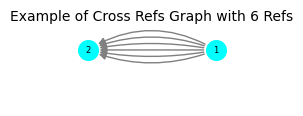

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.MultiDiGraph()
G.add_nodes_from([1, 2]) 
G.add_edges_from([(1, 2), (1, 2), (1, 2), (1, 2), (1, 2),(1, 2)])  
pos = nx.circular_layout(G)
plt.figure(figsize=(2, 1))
nx.draw_networkx_nodes(G, pos, node_color='cyan', node_size=200)
nx.draw_networkx_labels(G, pos, font_size=6)
for i, edge in enumerate(G.edges(keys=True)):
    rad = 0.1 * (i - 2)   
    nx.draw_networkx_edges(G, pos, edgelist=[(edge[0], edge[1])],
                           connectionstyle=f'arc3,rad={rad}',
                           edge_color='gray', arrows=True, arrowstyle='-|>', arrowsize=10)
plt.title("Example of Cross Refs Graph with 6 Refs", fontsize=10)
plt.axis('off')
plt.show()

# Results

## Create Operations

#### Create Single

In [287]:
import pandas as pd
import glob

# Find all CreateSingle_run_*.csv files
create_run_files = glob.glob('../results/RQ2/CreateSingle/CreateSingle_run_*.csv')

# Load and concatenate all runs
create_runs = pd.concat([pd.read_csv(f) for f in create_run_files], ignore_index=True)

ordered_create_runs = create_runs.sort_values('time',ascending=False)

ordered_create_runs.head(10)

,element_count,time,mem
35,100000,810,110475
17,100000,779,106596
26,100000,775,111533
44,100000,765,92531
8,100000,759,105273
43,50000,482,51402
34,50000,481,51951
25,50000,470,47541
7,50000,411,51556
16,50000,408,50131


In [288]:
# Group by element count
group_col = 'element_count' 

grouped = create_runs.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,6.2,3,13,402.4,386,417
1,50,5.6,5,7,402.8,367,438
2,100,5.8,5,7,499.2,424,588
3,500,11.8,9,16,991.0,911,1079
4,1000,11.4,10,14,1862.4,1785,1904
5,5000,40.6,36,52,8863.6,8834,8889
6,10000,86.6,72,98,17505.8,17465,17563
7,50000,450.4,408,482,50516.2,47541,51951
8,100000,777.6,759,810,105281.6,92531,111533


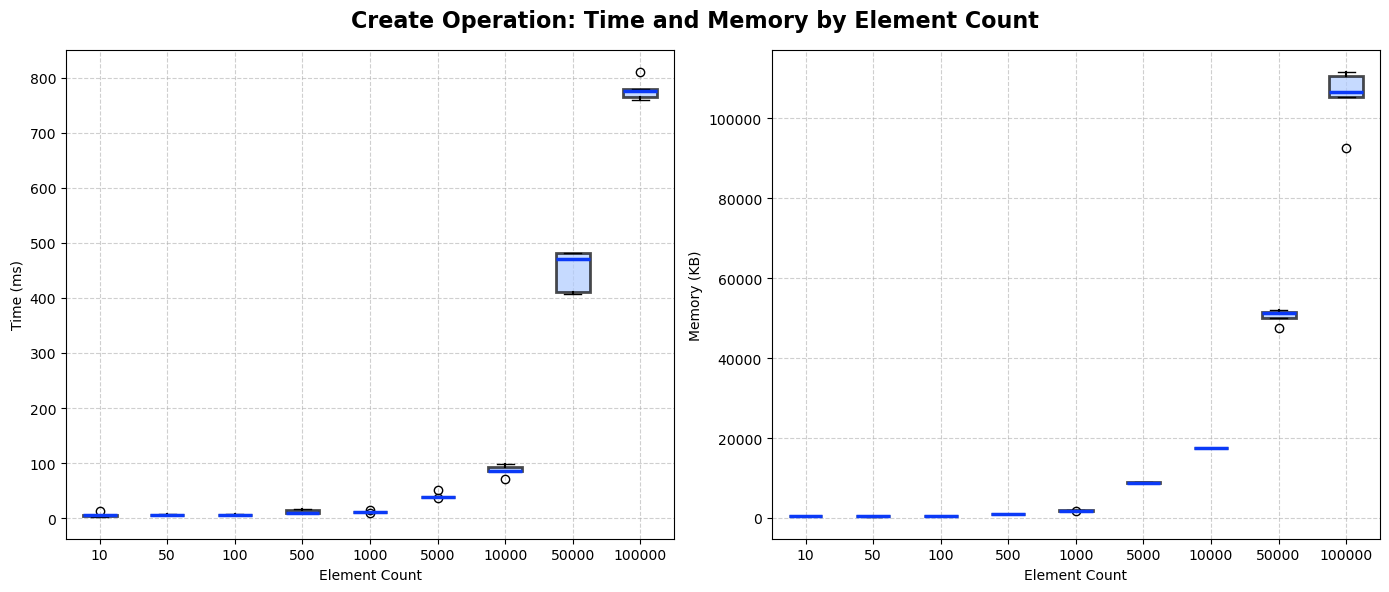

In [289]:
import matplotlib.pyplot as plt

group_col = 'element_count'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
create_runs.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
create_runs.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Create Operation: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#### Create Containment Width

In [290]:
import pandas as pd
import glob

# Find all CreateContainmentWidth_run_*.csv files
create_containment_run_files = glob.glob('../results/RQ2/CreateContainmentWidth/CreateContainmentWidth_run_*.csv')

# Load and concatenate all runs
create_containment_runs = pd.concat([pd.read_csv(f) for f in create_containment_run_files], ignore_index=True)

ordered_create_runs_containment = create_containment_runs.sort_values('time',ascending=False)

ordered_create_runs.head(10)

,element_count,time,mem
35,100000,810,110475
17,100000,779,106596
26,100000,775,111533
44,100000,765,92531
8,100000,759,105273
43,50000,482,51402
34,50000,481,51951
25,50000,470,47541
7,50000,411,51556
16,50000,408,50131


In [291]:
# Group by element count
group_col = 'element_count' 

grouped_containment = create_containment_runs.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped_containment.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,10.4,8,13,548.6,470,620
1,50,12.2,9,19,472.0,428,509
2,100,13.0,9,20,510.4,459,561
3,500,24.2,19,32,1845.8,1797,1898
4,1000,31.2,26,45,3336.0,3243,3590
5,5000,119.6,96,158,14573.2,14509,14645
6,10000,238.4,199,268,19873.0,18555,21504
7,50000,1156.2,1023,1280,84119.6,63335,96983
8,100000,2234.6,2003,2472,162118.2,105534,190363


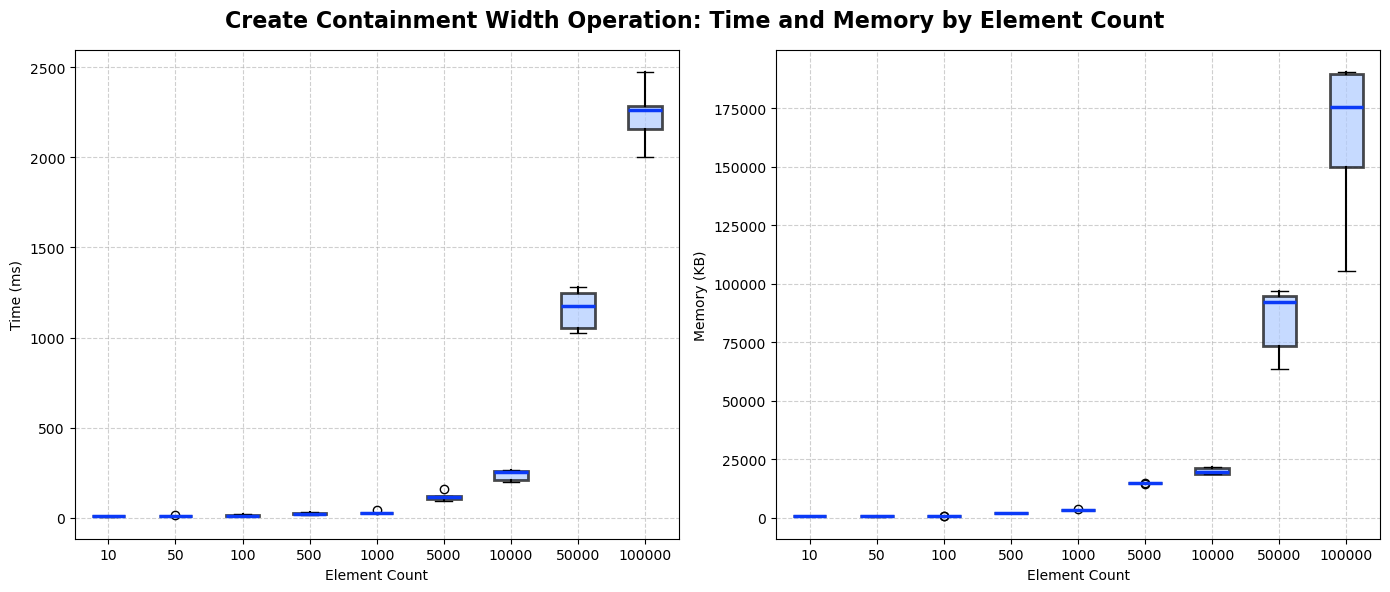

In [292]:
import matplotlib.pyplot as plt

group_col = 'element_count'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
create_containment_runs.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
create_containment_runs.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Create Containment Width Operation: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#### Create Containment Depth

In [293]:
import pandas as pd
import glob

# Find all CreateContainmentDepth_run_*.csv files
create_containment_d_run_files = glob.glob('../results/RQ2/CreateContainmentDepth/CreateContainmentDepth_run_*.csv')

# Load and concatenate all runs
create_containment_d_runs = pd.concat([pd.read_csv(f) for f in create_containment_d_run_files], ignore_index=True)

ordered_create_runs_containment = create_containment_d_runs.sort_values('time',ascending=False)

ordered_create_runs.head(10)

,element_count,time,mem
35,100000,810,110475
17,100000,779,106596
26,100000,775,111533
44,100000,765,92531
8,100000,759,105273
43,50000,482,51402
34,50000,481,51951
25,50000,470,47541
7,50000,411,51556
16,50000,408,50131


In [294]:
# Group by element count
group_col = 'element_count' 

grouped_containment_d = create_containment_d_runs.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped_containment_d.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,27.2,24,31,1418.4,1325,1533
1,50,38.2,21,93,846.8,749,917
2,100,21.8,16,34,852.2,798,929
3,500,35.8,28,48,2238.4,2162,2327
4,1000,37.8,33,42,3743.0,3736,3757
5,5000,170.0,152,187,10661.4,10098,11292
6,10000,251.8,212,277,21678.6,19827,23229
7,50000,1319.2,1285,1383,111040.8,101492,130050
8,100000,2257.2,2087,2472,196387.2,164676,235021


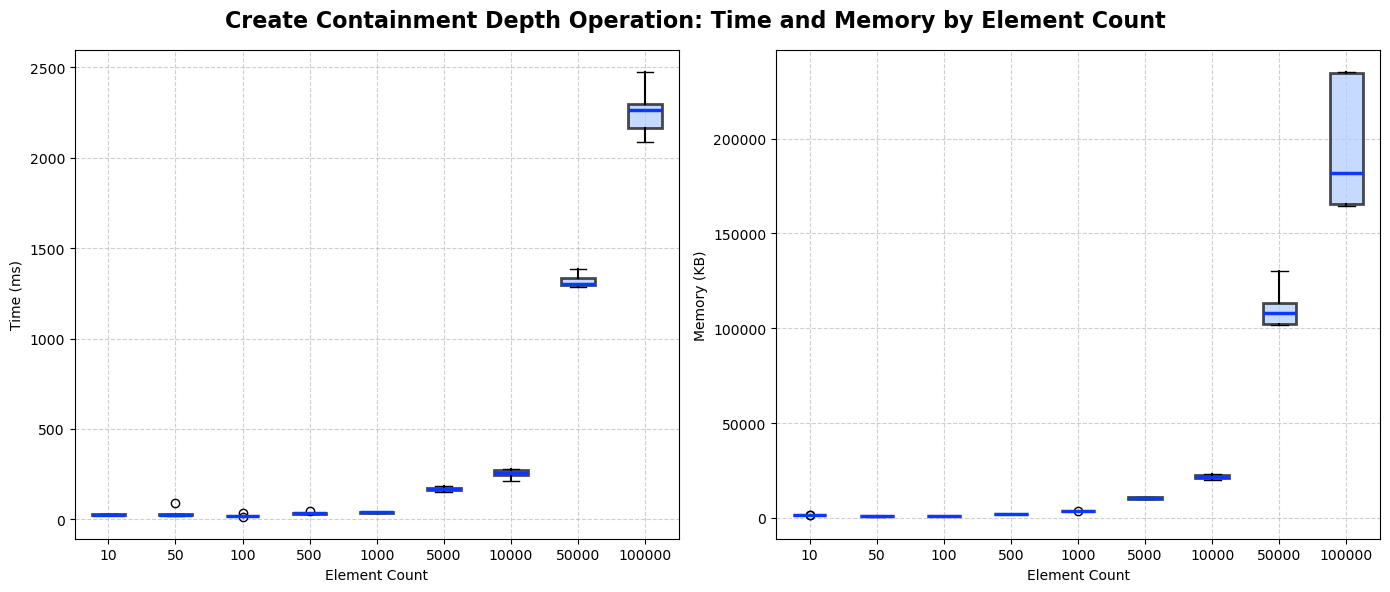

In [295]:
import matplotlib.pyplot as plt

group_col = 'element_count'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
create_containment_d_runs.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
create_containment_d_runs.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Create Containment Depth Operation: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#### Create Cross Ref

In [296]:
import pandas as pd
import glob

# Find all CreateContainmentWidth_run_*.csv files
create_cross_ref_run_files = glob.glob('../results/RQ2/CreateCrossRef/CreateCrossRef_run_*.csv')

# Load and concatenate all runs
create_cross_ref_run = pd.concat([pd.read_csv(f) for f in create_cross_ref_run_files], ignore_index=True)

ordered_create_cross_ref_run = create_cross_ref_run.sort_values('time',ascending=False)

ordered_create_cross_ref_run.head(10)

,element_count,time,mem
35,100000,1555,35913
17,100000,1525,47511
8,100000,1350,42734
44,100000,1276,45276
26,100000,1248,38654
7,50000,703,27412
34,50000,687,24853
16,50000,686,19563
25,50000,632,18897
43,50000,624,22965


In [297]:
# Group by element count
group_col = 'element_count' 

grouped_cross_ref = create_cross_ref_run.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped_cross_ref.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,8.2,4,20,358.2,305,406
1,50,24.0,17,29,385.0,328,433
2,100,8.6,6,16,419.2,382,464
3,500,27.0,21,34,864.2,773,924
4,1000,19.2,14,23,1418.0,1332,1498
5,5000,68.4,62,76,5309.8,5181,5423
6,10000,127.8,120,141,10079.0,10043,10120
7,50000,666.4,624,703,22738.0,18897,27412
8,100000,1390.8,1248,1555,42017.6,35913,47511


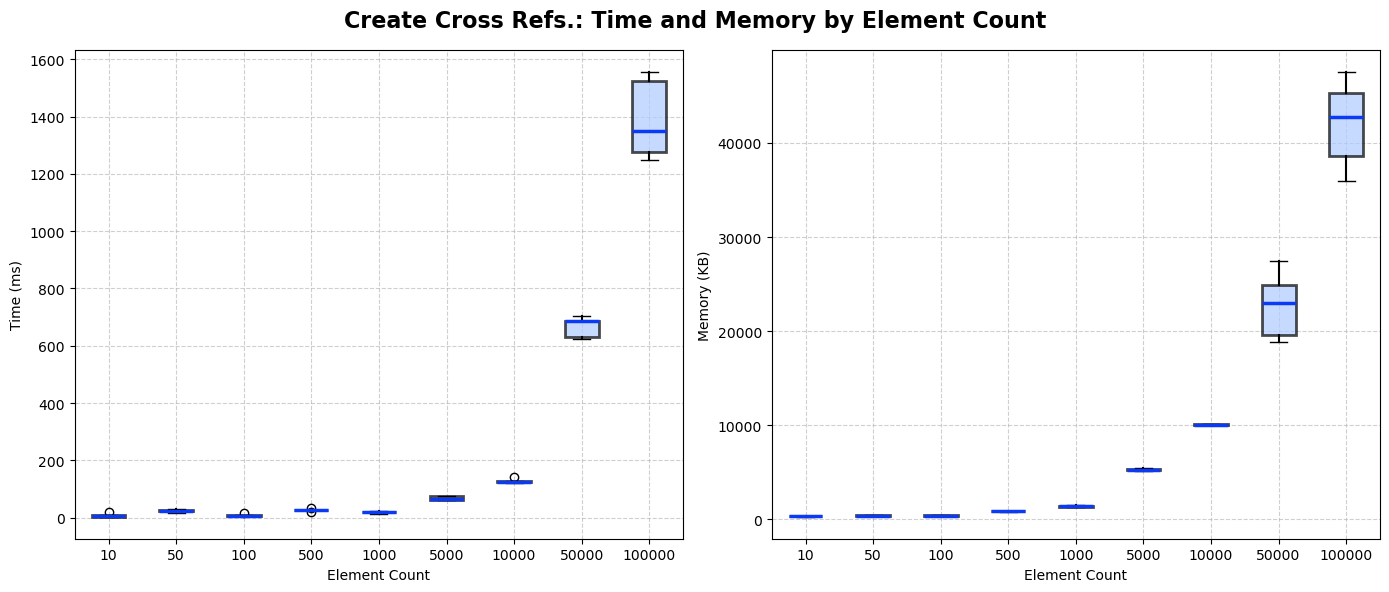

In [298]:
import matplotlib.pyplot as plt

group_col = 'element_count'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
create_cross_ref_run.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
create_cross_ref_run.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Create Cross Refs.: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Read Operations

### Read 

In [299]:
import pandas as pd
import glob

 
read_run_files = glob.glob('../results/RQ2/Read/Read_run_*.csv')

# Load and concatenate all runs
read_runs = pd.concat([pd.read_csv(f) for f in read_run_files], ignore_index=True)

ordered_read_runs = read_runs.sort_values('time',ascending=False)

ordered_read_runs.head(10)

,element_count,time,mem
8,100000,464,54039
26,100000,447,52131
35,100000,390,50544
17,100000,385,61355
44,100000,358,51360
43,50000,186,40751
34,50000,182,27910
25,50000,174,30466
7,50000,170,39723
16,50000,154,30250


In [300]:
# Group by element count
group_col = 'element_count' 

grouped_read = read_runs.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped_read.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,8.2,3,12,668.2,621,738
1,50,4.0,3,5,633.4,599,659
2,100,3.8,3,4,627.6,608,663
3,500,5.8,5,6,869.6,655,1024
4,1000,7.2,6,9,1702.2,1610,1801
5,5000,18.8,16,22,6300.6,6144,6361
6,10000,30.4,27,35,13932.8,13865,14057
7,50000,173.2,154,186,33820.0,27910,40751
8,100000,408.8,358,464,53885.8,50544,61355


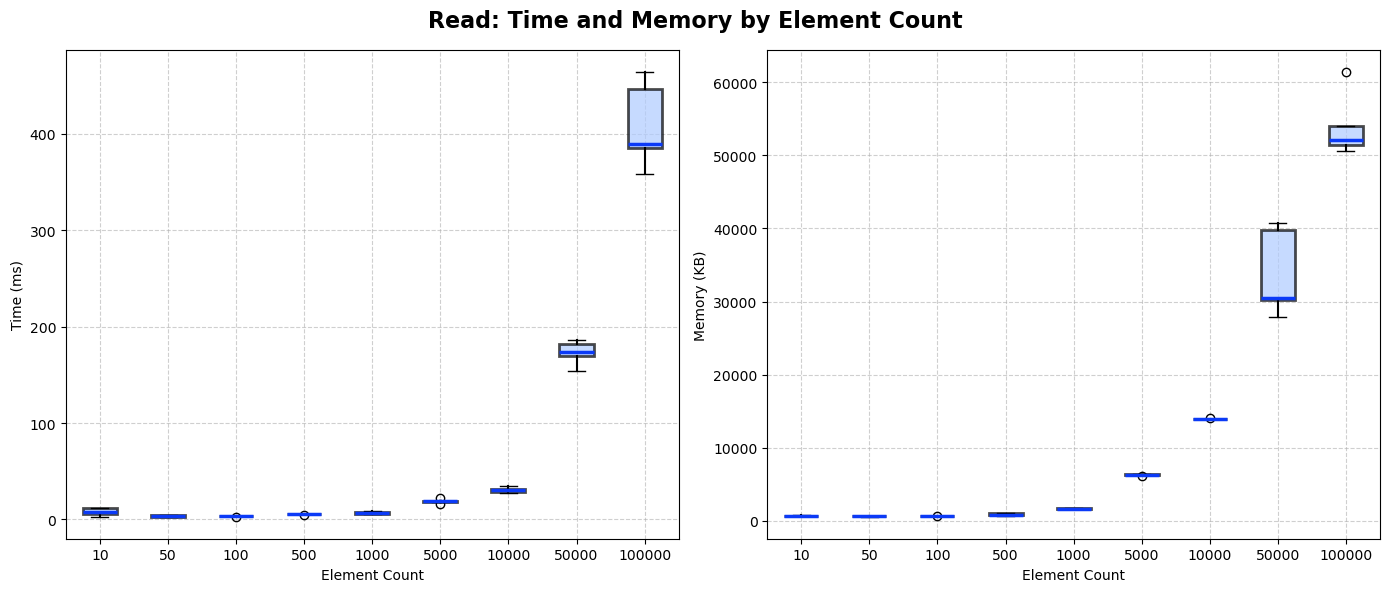

In [301]:
import matplotlib.pyplot as plt

group_col = 'element_count'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
read_runs.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
read_runs.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Read: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Read Containment Width

In [302]:
import pandas as pd
import glob

 
read_c_w_run_files = glob.glob('../results/RQ2/ReadContainmentWidth/ReadContainmentWidth_run_*.csv')

# Load and concatenate all runs
read_c_w_runs = pd.concat([pd.read_csv(f) for f in read_c_w_run_files], ignore_index=True)

ordered_read_c_w_runs = read_c_w_runs.sort_values('time',ascending=False)

ordered_read_c_w_runs.head(10)

,element_count,time,mem
17,100000,388,60145
35,100000,386,54042
44,100000,385,41898
8,100000,360,42705
26,100000,349,51277
7,50000,214,28016
16,50000,191,31434
25,50000,179,31301
34,50000,177,37209
43,50000,158,37339


In [303]:
# Group by element count
group_col = 'element_count' 

grouped_read_c_w_runs = read_c_w_runs.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped_read_c_w_runs.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,18.4,4,70,610.6,567,659
1,50,4.0,3,5,568.2,528,593
2,100,3.0,3,3,546.8,511,569
3,500,7.0,4,13,920.0,728,1024
4,1000,7.4,6,9,1738.0,1640,1881
5,5000,22.2,15,39,6977.2,6260,8036
6,10000,33.4,31,36,15281.8,13536,17799
7,50000,183.8,158,214,33059.8,28016,37339
8,100000,373.6,349,388,50013.4,41898,60145


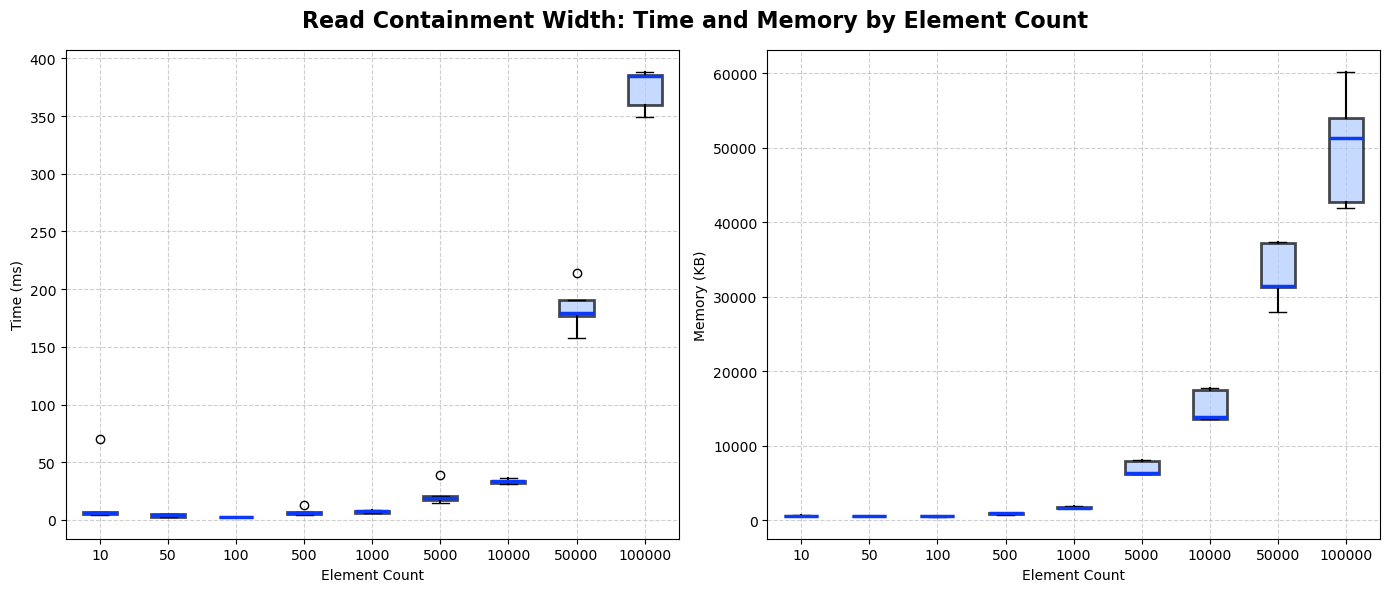

In [304]:
import matplotlib.pyplot as plt

group_col = 'element_count'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
read_c_w_runs.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
read_c_w_runs.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Read Containment Width: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Read Containment Depth

In [305]:
import pandas as pd
import glob

 
read_c_d_run_files = glob.glob('../results/RQ2/ReadContainmentDepth/ReadContainmentDepth_run_*.csv')

# Load and concatenate all runs
read_c_d_runs = pd.concat([pd.read_csv(f) for f in read_c_d_run_files], ignore_index=True)

ordered_read_c_d_runs = read_c_d_runs.sort_values('time',ascending=False)

ordered_read_c_d_runs.head(10)

,element_count,time,mem
17,100000,450,67343
26,100000,445,61406
8,100000,426,64611
44,100000,406,70500
35,100000,392,57405
34,50000,246,30086
25,50000,183,37947
43,50000,180,32205
7,50000,179,38924
16,50000,178,41185


In [306]:
# Group by element count
group_col = 'element_count' 

grouped_read_c_w_runs = read_c_w_runs.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped_read_c_w_runs.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,18.4,4,70,610.6,567,659
1,50,4.0,3,5,568.2,528,593
2,100,3.0,3,3,546.8,511,569
3,500,7.0,4,13,920.0,728,1024
4,1000,7.4,6,9,1738.0,1640,1881
5,5000,22.2,15,39,6977.2,6260,8036
6,10000,33.4,31,36,15281.8,13536,17799
7,50000,183.8,158,214,33059.8,28016,37339
8,100000,373.6,349,388,50013.4,41898,60145


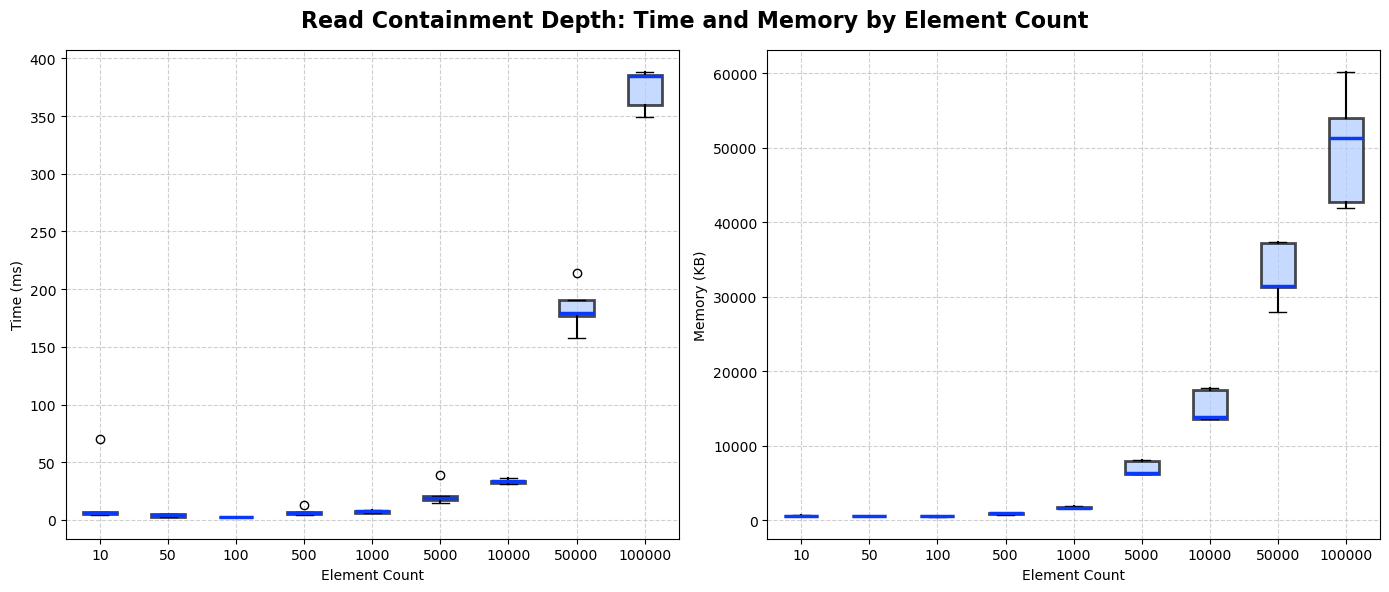

In [307]:
import matplotlib.pyplot as plt

group_col = 'element_count'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
read_c_w_runs.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
read_c_w_runs.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Read Containment Depth: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Read Cross Ref

In [308]:
import pandas as pd
import glob

 
read_cross_ref_run_files = glob.glob('../results/RQ2/ReadCrossRef/ReadCrossRef_run_*.csv')

# Load and concatenate all runs
read_cross_ref_runs = pd.concat([pd.read_csv(f) for f in read_cross_ref_run_files], ignore_index=True)

ordered_read_cross_ref_runs = read_cross_ref_runs.sort_values('time',ascending=False)

ordered_read_cross_ref_runs.head(10)

,element_count,time,mem
36,10,94,489
27,10,46,417
0,10,38,472
2,100,31,420
9,10,31,434
38,100,31,410
18,10,30,450
10,50,30,404
28,50,30,401
37,50,29,429


In [309]:
# Group by element count
group_col = 'element_count' 

grouped_read_cross_ref_runs = read_cross_ref_runs.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped_read_cross_ref_runs.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,47.8,30,94,452.4,417,489
1,50,27.8,21,30,420.8,401,436
2,100,27.0,23,31,409.8,400,420
3,500,23.6,21,29,412.0,404,423
4,1000,21.4,21,22,409.4,389,438
5,5000,22.2,21,24,398.8,373,420
6,10000,21.8,20,23,398.8,376,420
7,50000,22.6,21,26,403.0,371,433
8,100000,22.2,20,24,411.0,370,461


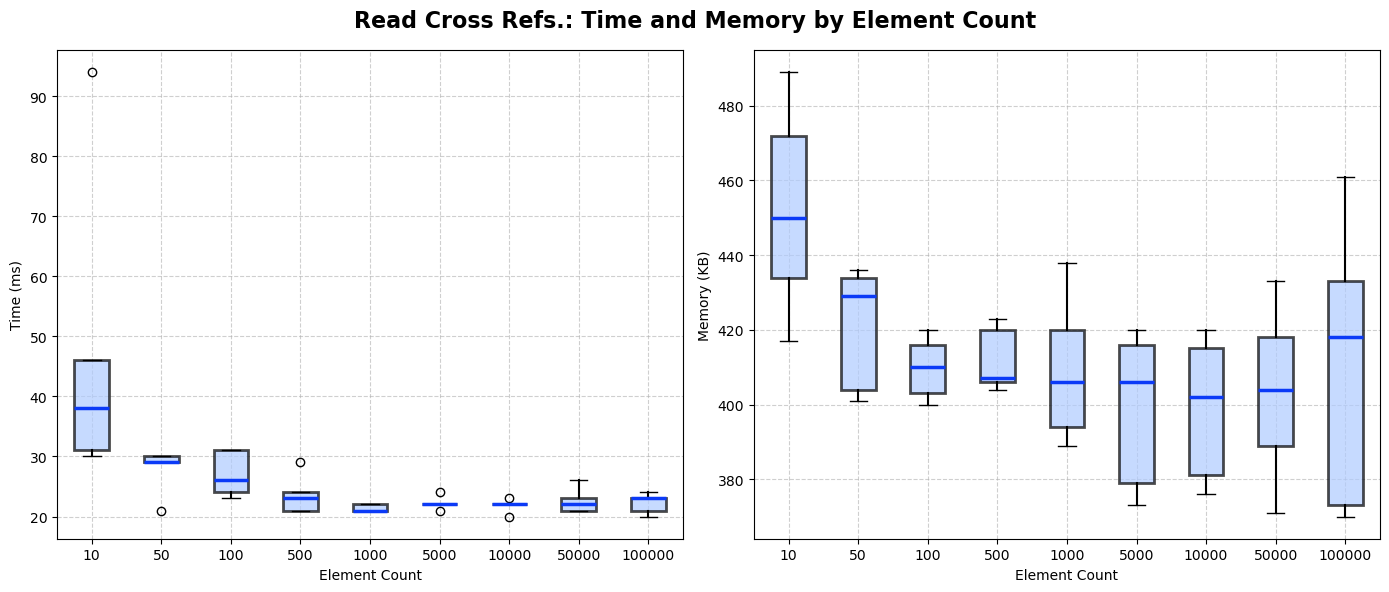

In [310]:
import matplotlib.pyplot as plt

group_col = 'element_count'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
read_cross_ref_runs.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
read_cross_ref_runs.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Read Cross Refs.: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Update Operations

### Update

In [311]:
import pandas as pd
import glob

 
update_run_files = glob.glob('../results/RQ2/Update/Update_run_*.csv')

# Load and concatenate all runs
update_runs = pd.concat([pd.read_csv(f) for f in update_run_files], ignore_index=True)

ordered_update_runs = update_runs.sort_values('time',ascending=False)

ordered_update_runs.head(10)

,element_count,time,mem
8,100000,817,96255
35,100000,791,96266
17,100000,790,96318
26,100000,763,95600
44,100000,731,96169
16,50000,511,49457
34,50000,458,49413
25,50000,447,49113
43,50000,385,50010
7,50000,363,49926


In [312]:
# Group by element count
group_col = 'element_count' 

grouped_update_runs = update_runs.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped_update_runs.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,22.6,11,60,1269.2,1026,1637
1,50,12.4,6,31,1274.8,1026,1665
2,100,10.0,6,17,1126.8,1024,1538
3,500,15.4,7,33,1538.0,1538,1538
4,1000,14.2,10,19,2048.0,2048,2048
5,5000,59.2,45,88,7168.0,7168,7168
6,10000,115.2,88,135,13312.0,13312,13312
7,50000,432.8,363,511,49583.8,49113,50010
8,100000,778.4,731,817,96121.6,95600,96318


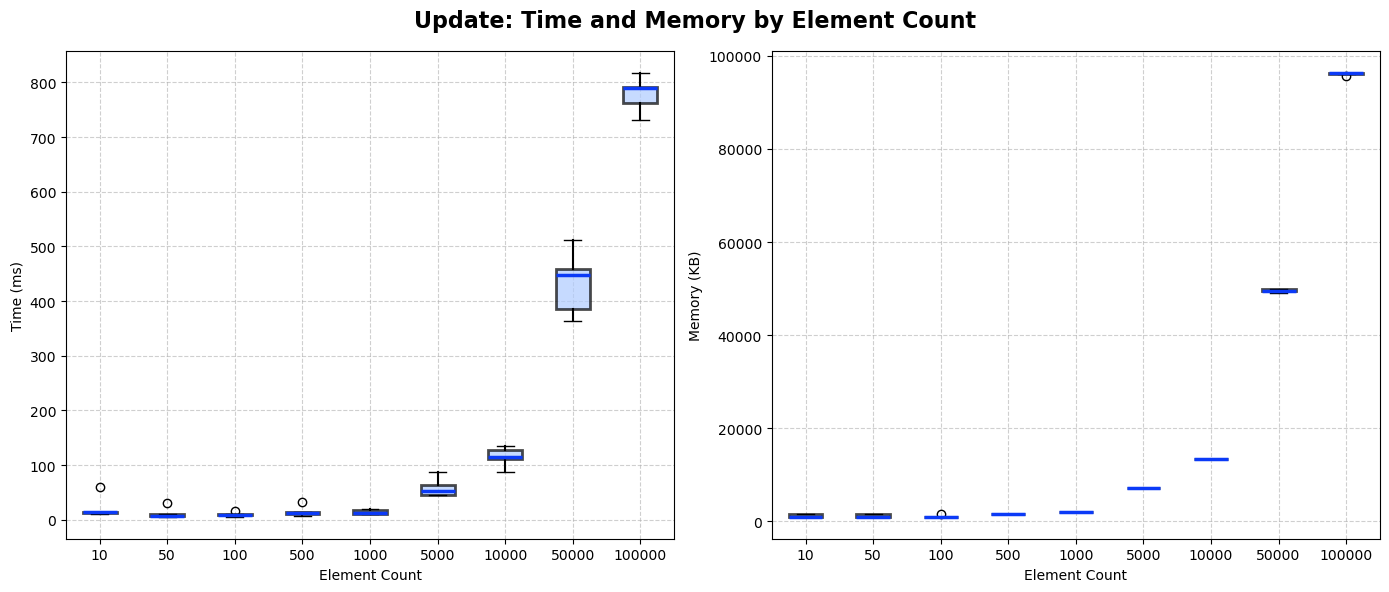

In [313]:
import matplotlib.pyplot as plt

group_col = 'element_count'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
update_runs.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
update_runs.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Update: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Delete Operations

### Delete Single

In [314]:
import pandas as pd
import glob

 
delete_s_run_files = glob.glob('../results/RQ2/DeleteSingle/DeleteSingle_run_*.csv')

# Load and concatenate all runs
delete_s_runs = pd.concat([pd.read_csv(f) for f in delete_s_run_files], ignore_index=True)

ordered_delete_s_runs = delete_s_runs.sort_values('time',ascending=False)

ordered_delete_s_runs.head(10)

,element_count,time,mem
8,100000,678,79267
17,100000,664,83098
35,100000,654,78317
44,100000,623,82572
26,100000,588,83480
25,50000,391,74574
34,50000,386,74477
16,50000,360,74687
7,50000,345,74663
43,50000,318,74483


In [315]:
# Group by element count
group_col = 'element_count' 

grouped_delete_s_runs = delete_s_runs.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped_delete_s_runs.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,38.4,26,63,1026.0,1026,1026
1,50,40.2,16,120,1026.0,1026,1026
2,100,5.0,4,6,1026.0,1026,1026
3,500,23.0,20,30,1538.0,1538,1538
4,1000,12.6,10,20,2048.0,2048,2048
5,5000,53.8,44,81,9730.0,9730,9730
6,10000,69.0,66,76,18432.0,18432,18432
7,50000,360.0,318,391,74576.8,74477,74687
8,100000,641.4,588,678,81346.8,78317,83480


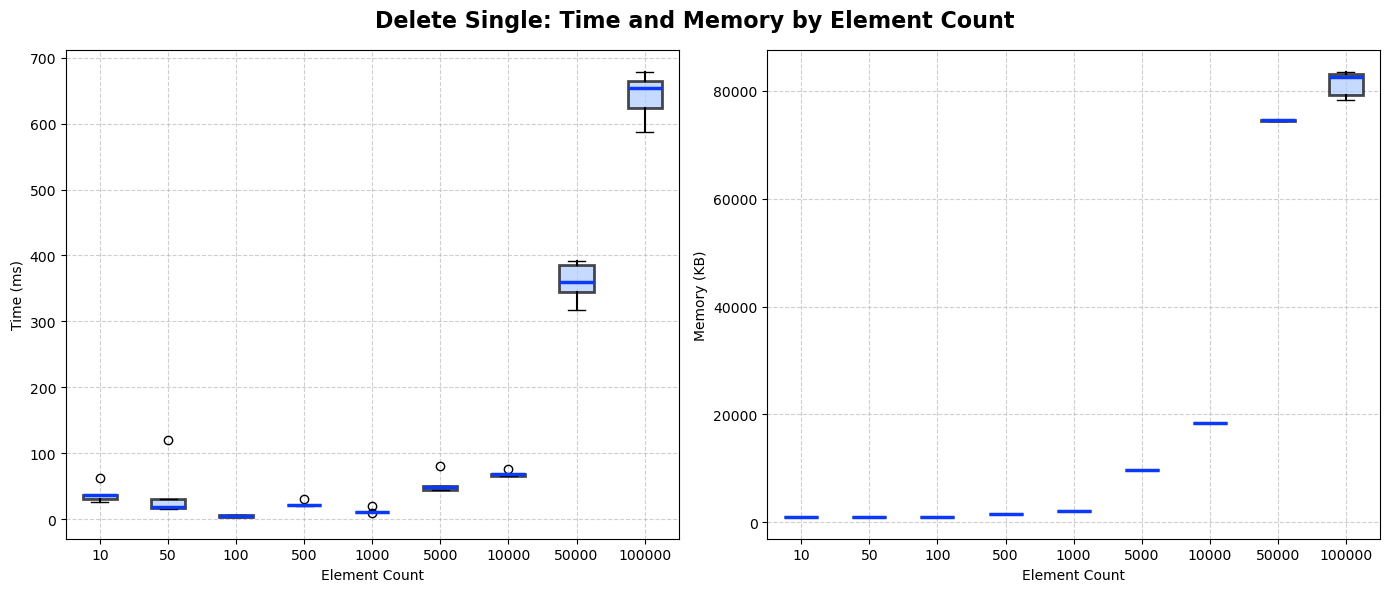

In [316]:
import matplotlib.pyplot as plt

group_col = 'element_count'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
delete_s_runs.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
delete_s_runs.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Delete Single: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Delete Containment Width

In [317]:
import pandas as pd
import glob

 
delete_c_w_run_files = glob.glob('../results/RQ2/DeleteContainmentWidth/DeleteContainmentWidth_run_*.csv')

# Load and concatenate all runs
delete_c_w_runs = pd.concat([pd.read_csv(f) for f in delete_c_w_run_files], ignore_index=True)

ordered_delete_c_w_runs = delete_c_w_runs.sort_values('time',ascending=False)

ordered_delete_c_w_runs.head(10)

,element_count,time,mem
26,100000,1275,49138
35,100000,1252,48157
44,100000,1203,84722
8,100000,1197,82878
17,100000,1116,43693
34,50000,689,89602
43,50000,629,91136
25,50000,611,90112
7,50000,609,88578
16,50000,587,89602


In [318]:
# Group by element count
group_col = 'element_count' 

grouped_delete_c_w_runs = delete_c_w_runs.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped_delete_c_w_runs.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,25.4,11,46,1028.2,1026,1031
1,50,20.4,7,39,1026.0,1026,1026
2,100,9.4,4,22,1026.0,1026,1026
3,500,22.8,11,38,1538.0,1538,1538
4,1000,14.6,13,15,2253.6,2048,2562
5,5000,114.0,72,192,9626.4,9216,10240
6,10000,134.6,116,175,18432.8,17922,18946
7,50000,625.0,587,689,89806.0,88578,91136
8,100000,1208.6,1116,1275,61717.6,43693,84722


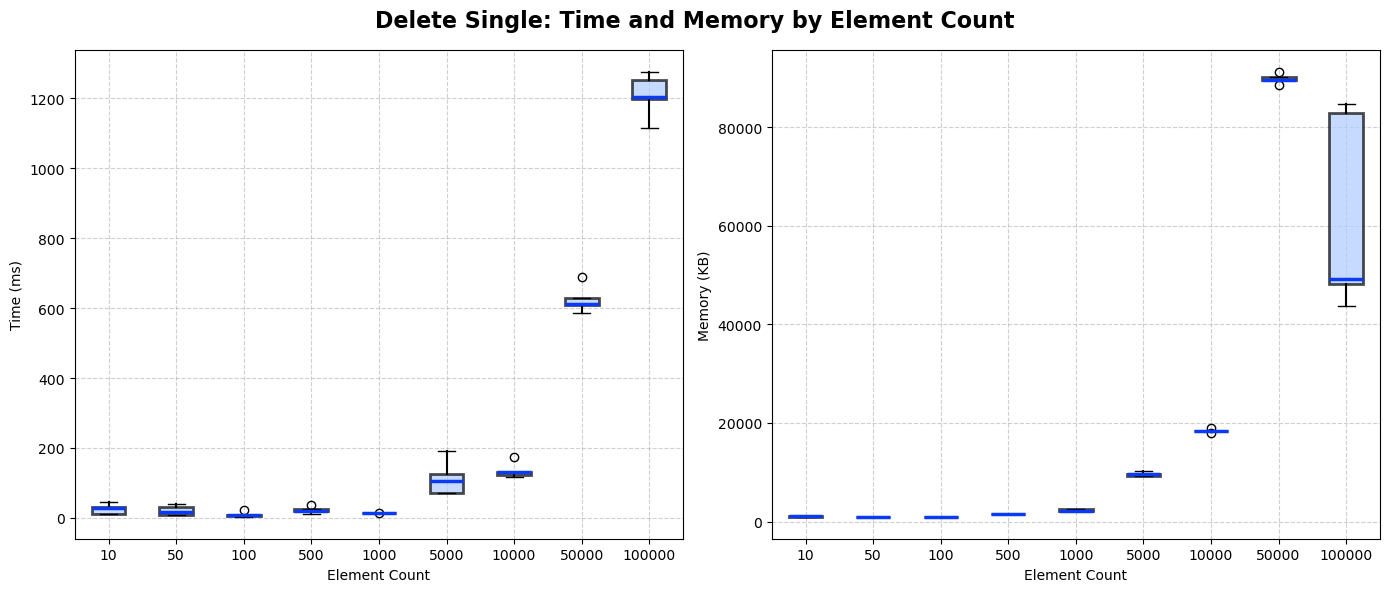

In [319]:
import matplotlib.pyplot as plt

group_col = 'element_count'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
delete_c_w_runs.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
delete_c_w_runs.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Delete Single: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Delete Containment Width

In [320]:
import pandas as pd
import glob 
 
delete_c_d_run_files = glob.glob('../results/RQ2/DeleteContainmentDepth/DeleteContainmentDepth_run_*.csv') 
# Load and concatenate all runs
delete_c_d_runs = pd.concat([pd.read_csv(f) for f in delete_c_d_run_files], ignore_index=True) 
ordered_delete_c_d_runs = delete_c_d_runs.sort_values('time',ascending=False) 
ordered_delete_c_d_runs.head(10)

,element_count,time,mem
17,100000,1084,72704
35,100000,1081,97280
44,100000,1009,72194
26,100000,1000,72704
34,50000,498,51576
7,50000,398,45031
33,10000,104,9780
25,50000,104,11154
6,10000,101,10381
15,10000,87,10240


In [321]:
# Group by element count
group_col = 'element_count' 

grouped_delete_d_w_runs = delete_c_d_runs.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped_delete_d_w_runs.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,5.0,4,6,581.6,500,644
1,50,5.6,4,7,507.6,470,530
2,100,8.4,4,19,497.2,465,523
3,500,8.8,7,10,976.6,919,1024
4,1000,14.6,11,20,1507.2,1477,1534
5,5000,31.0,9,50,3098.4,508,4557
6,10000,79.0,27,104,8496.4,3445,10381
7,50000,211.8,18,498,22986.6,1538,51576
8,100000,839.0,21,1084,63284.0,1538,97280


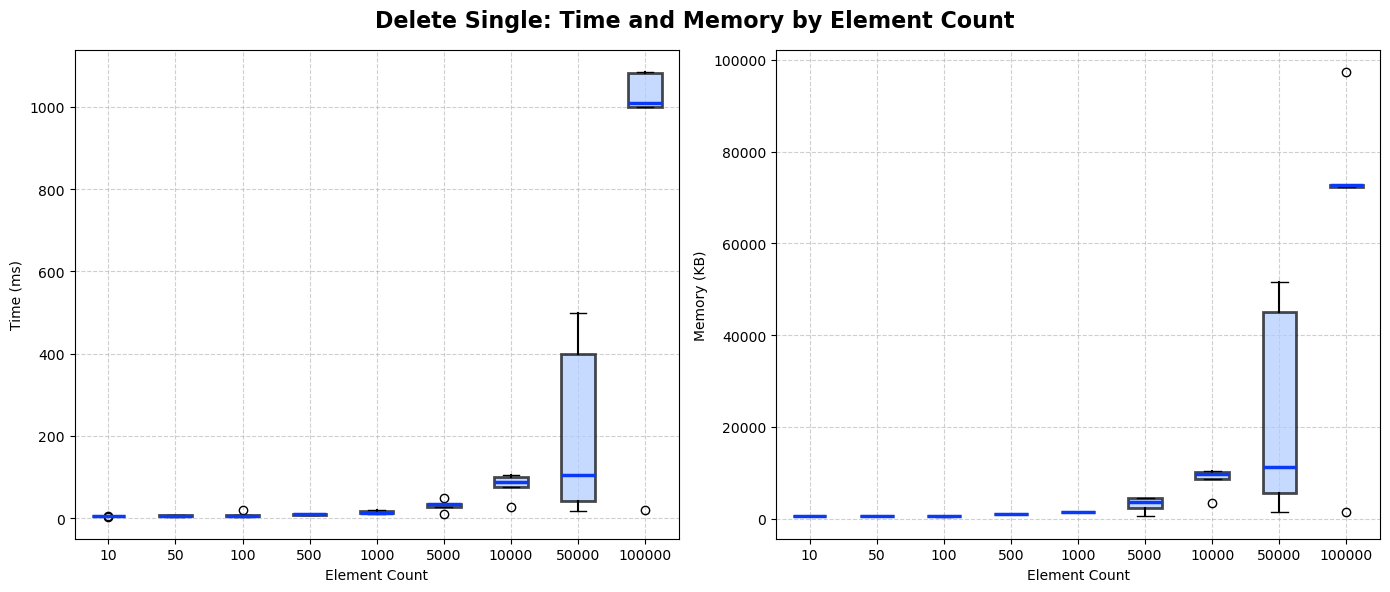

In [322]:
import matplotlib.pyplot as plt

group_col = 'element_count' 
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
delete_c_d_runs.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
delete_c_d_runs.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Delete Single: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Delete Cross Ref

In [323]:
import pandas as pd
import glob 
 
delete_c_r_run_files = glob.glob('../results/RQ2/DeleteCrossRef/DeleteCrossRef_run_*.csv') 
# Load and concatenate all runs
delete_c_r_runs = pd.concat([pd.read_csv(f) for f in delete_c_r_run_files], ignore_index=True) 
ordered_delete_c_r_runs = delete_c_r_runs.sort_values('time',ascending=False) 
ordered_delete_c_r_runs.head(10)

,element_count,time,mem
17,100000,854,5797
35,100000,837,5659
44,100000,825,5794
8,100000,798,5776
26,100000,733,5710
16,50000,297,3018
34,50000,290,3044
7,50000,277,2978
43,50000,257,3050
25,50000,246,2939


In [324]:
# Group by element count
group_col = 'element_count' 

grouped_delete_d_r_runs = delete_c_r_runs.groupby(group_col).agg(
    avg_time=('time', 'mean'),
    min_time=('time', 'min'),
    max_time=('time', 'max'),
    avg_mem=('mem', 'mean'),
    min_mem=('mem', 'min'),
    max_mem=('mem', 'max'),
).reset_index()

grouped_delete_d_r_runs.head(10)

,element_count,avg_time,min_time,max_time,avg_mem,min_mem,max_mem
0,10,7.0,5,10,447.6,396,500
1,50,6.4,5,8,395.4,358,421
2,100,7.0,6,8,373.8,340,402
3,500,19.8,14,26,376.2,340,430
4,1000,28.0,16,42,375.0,330,411
5,5000,24.6,19,36,471.6,368,656
6,10000,43.6,35,53,804.8,652,953
7,50000,273.4,246,297,3005.8,2939,3050
8,100000,809.4,733,854,5747.2,5659,5797


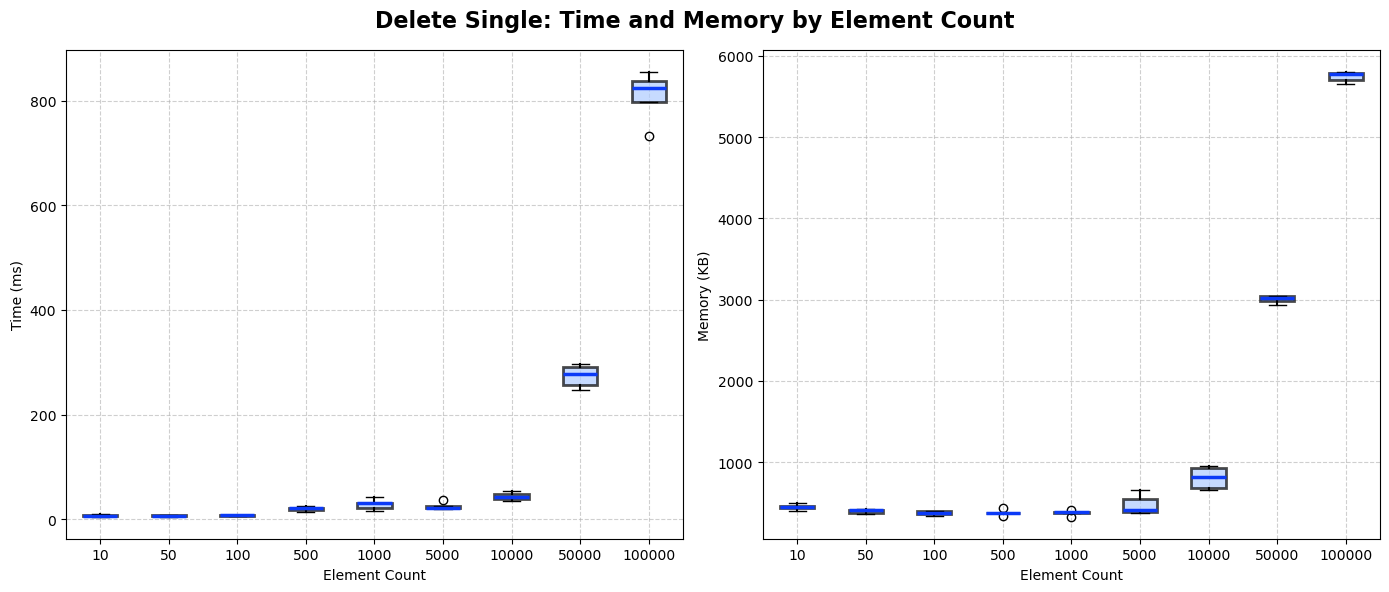

In [325]:
import matplotlib.pyplot as plt

group_col = 'element_count' 
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for time
delete_c_r_runs.boxplot(column='time', by=group_col, ax=axes[0], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[0].set_title('')
axes[0].set_xlabel('Element Count')
axes[0].set_ylabel('Time (ms)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot for memory
delete_c_r_runs.boxplot(column='mem', by=group_col, ax=axes[1], patch_artist=True,
                   boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
                   medianprops=dict(color="#0B3AF7", linewidth=2.5),
                   whiskerprops=dict(color='black', linewidth=1.5))
axes[1].set_xlabel('Element Count')
axes[1].set_ylabel('Memory (KB)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_title('')

plt.suptitle('Delete Single: Time and Memory by Element Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()